In [ ]:
import warnings
warnings.simplefilter(action='ignore')

import os
from tqdm import tqdm
import pandas as pd
import ast
from utility.utility import get_model, loadImages
import pickle
from tk_module.tkapp import SpotApp
if __name__ == "__main__":
    spot_df = pd.read_csv('./data/coordinates.csv')
    name_to_net_dict = {}
    for idx, row in spot_df.iterrows():
        spot_names = ast.literal_eval(row['行程']) 
        spot_paths = ast.literal_eval(row['出現網格'])  
        for name, path in zip(spot_names, spot_paths):
            name_to_net_dict[name] = path


    weights = {
        "autumn_weight": './model_params/autumn_checkpoints/cyclegan_checkpoints.048',
        "foggy_weight": './model_params/foggy_checkpoints/cyclegan_checkpoints.200',
        "gloomy_weight": './model_params/gloomy_checkpoints/cyclegan_checkpoints.045',
    }
    models = {f"{key.split('_')[0] + '_model'}": get_model(val).gen_G for key, val in tqdm(weights.items())}
    
    images = loadImages(directory='./images', models=models)
    with open("./model_params/GAN.pkl", 'rb') as F:
        model_set = pickle.load(F)


    app = SpotApp(name_to_net_dict=name_to_net_dict, model_set=model_set, images=images)
    app.mainloop()

100%|██████████| 3/3 [00:20<00:00,  6.82s/it]


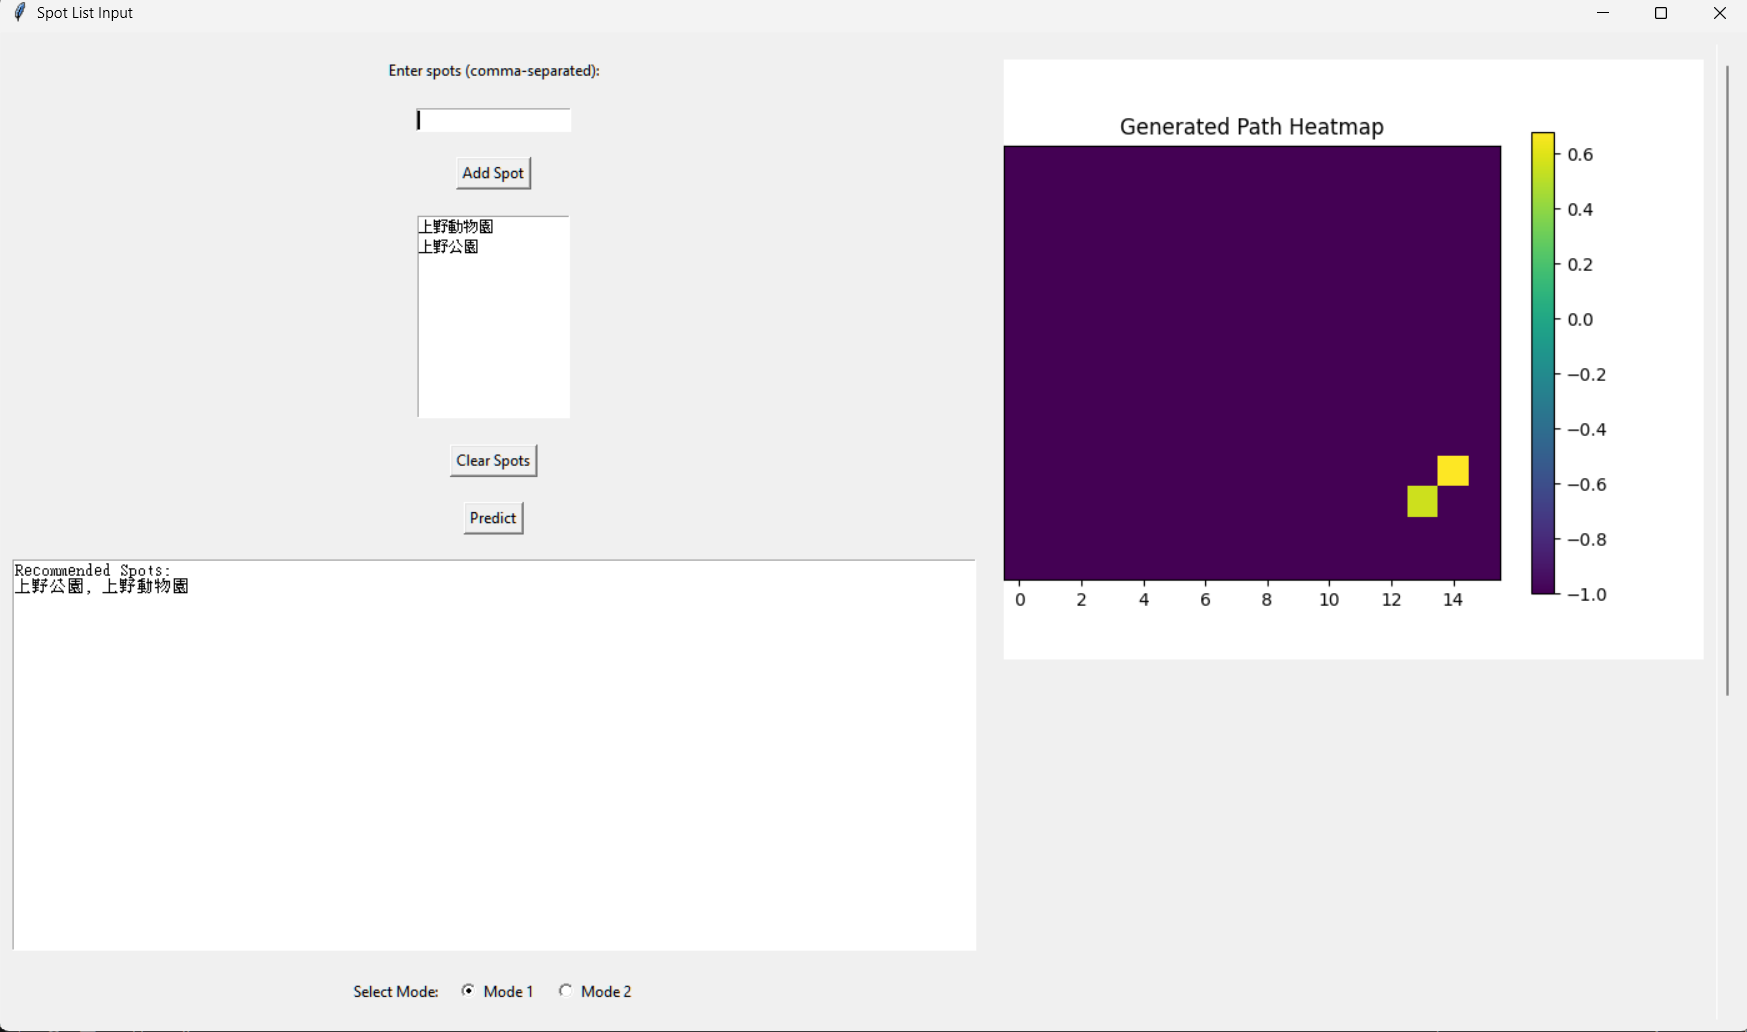